<a href="https://colab.research.google.com/github/Mridul232/Mridul232/blob/main/langraph_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langgraph langsmith

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.6 MB/s eta 0:00:00


In [3]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.25
    Uninstalling langchain-core-0.3.25:
      Successfully uninstalled langchain-core-0.3.25
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.12
    Uninstalling langchain-0.3.12:
      Successfully uninstalled langchain-0.3.12


In [11]:
from google.colab import userdata
GROQ_API_KEY=userdata.get('langchain_model')
print(GROQ_API_KEY)
langsmith_api_key=userdata.get('langsmith_api_key')
print(langsmith_api_key)

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
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


In [25]:
import os
os.environ["GROQ_API_KEY"] = "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"
os.environ["LANGCHAIN_API_KEY"] = langsmith_api_key
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"]= "CourseLanggraph"

In [26]:
from langchain_groq import ChatGroq

In [27]:
llm = ChatGroq(model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7cd3bd7546a0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7cd3bd7e42e0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [29]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [30]:
class State(TypedDict):
  messages:Annotated[list,add_messages]
graph_builder=StateGraph(State)


In [31]:
graph_builder

In [32]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [33]:
graph_builder.add_node("chatbot",chatbot)

In [34]:
graph_builder

In [36]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

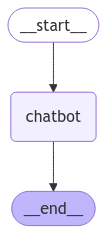

In [37]:
graph_builder.compile()

In [43]:
runnable = graph_builder.compile()

while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in runnable.stream({'messages':("user",user_input)}): # Corrected line
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

User: hi
dict_values([{'messages': AIMessage(content='Hello! 👋  How can I help you today?\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 10, 'total_tokens': 24, 'completion_time': 0.025454545, 'prompt_time': 4e-07, 'queue_time': 0.020764477, 'total_time': 0.025454945}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-a835a394-4ce3-4169-b480-ddc14b8a9c8c-0', usage_metadata={'input_tokens': 10, 'output_tokens': 14, 'total_tokens': 24})}])
content='Hello! 👋  How can I help you today?\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 10, 'total_tokens': 24, 'completion_time': 0.025454545, 'prompt_time': 4e-07, 'queue_time': 0.020764477, 'total_time': 0.025454945}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-a835a394-4ce3-4169-b480-ddc14b8a